In [3]:
# This cell expands the cells of the notebook to the width of the window
from IPython.display import display, HTML
display(HTML("<style>div.cell {width:100% !important;}</style>"))

# Week 5

## Python setup

In [4]:
%%capture
pip install fa2_modified

In [5]:
%%capture
pip install powerlaw

In [6]:
from fa2_modified import ForceAtlas2
import math
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib import colormaps
import networkx as nx
import numpy as np
import os
import powerlaw
import random
import re
from statistics import mean, median, mode
import urllib.request
import numpy as np
from scipy.stats import pearsonr, spearmanr

## Exercises Part A: Visualizations

In this section, we are introduced to the library [ForceAtlas2 (_Modified version)_](https://github.com/AminAlam/fa2_modified). The library is a more powerful alternative to the networkX library and can help create better visualisations.

In [7]:
# Folder to store the text files
cwd = os.getcwd()
folder_name = "saved_graphs"
folder_path = os.path.join(cwd, folder_name)
folder_path

'c:\\Users\\Julia\\Documents\\DTU\\02805_Social_Graphs_and_Interactions\\Exercise_solutions\\saved_graphs'

In [8]:
# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")

In [9]:
# load graph object from file
G = nx.read_gexf(file_path)

### A.1 Plot the Network using ForceAtlas2

Below is the code taken from the example in the documentation:

In [10]:
# We remove orphan nodes so our visualization isnt distorted by nodes that aren't connected to the other ones
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

In [11]:
# Create ForceAtlas2 configuration
fa2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=4.0,

    # Performance
    jitterTolerance=8.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=0.1,

    # Log
    verbose=True
    )

In [12]:
# Running the algorithm to get node positions
positions = fa2.forceatlas2_networkx_layout(G, pos=None, iterations=200)

100%|██████████| 200/200 [00:09<00:00, 22.02it/s]

BarnesHut Approximation  took  0.85  seconds
Repulsion forces  took  7.73  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


In [13]:
# Extract the 'length_of_content' attribute values
lengths = nx.get_node_attributes(G, 'length_of_content').values()

# Normalize these values to range [0, 1] for colormap application
norm = mcolors.Normalize(vmin=min(lengths), vmax=max(lengths))

# Choose a colormap; e.g., 'rainbow'
cmap_ = cm.rainbow

# Map each node's 'length_of_content' to a color
node_colors = [cmap_(norm(length)) for length in lengths]

# Set node sizes based on node degrees (scaled for visibility)
node_sizes = [G.degree(node) * 3 for node in G.nodes]  # Multiplied by 300 for better scaling

c:\Users\Julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


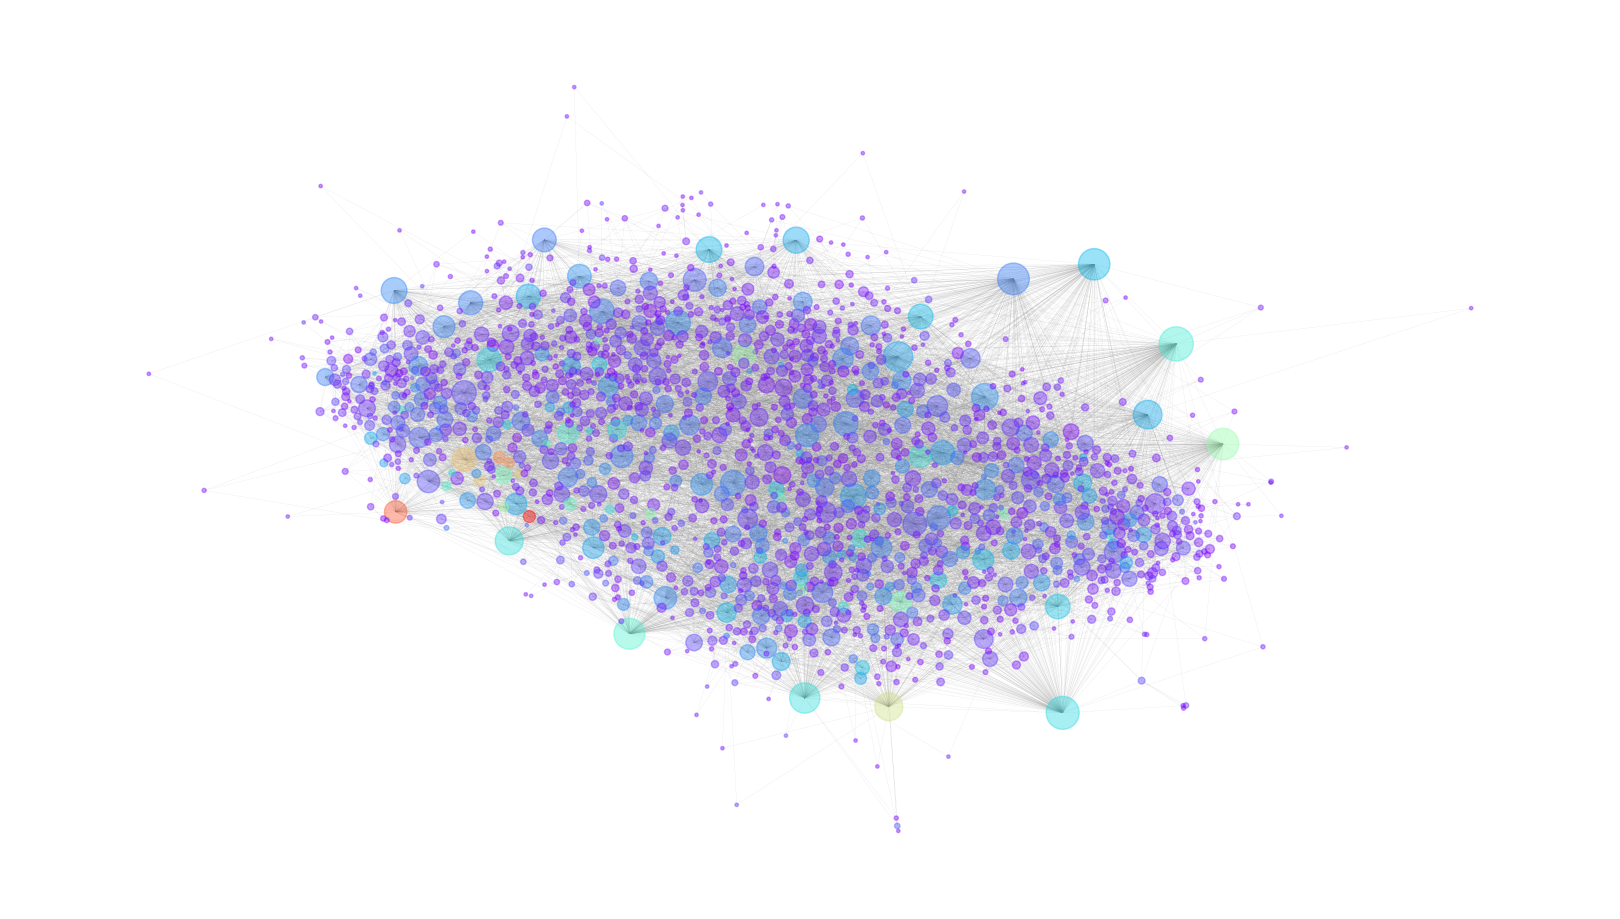

In [14]:
plt.figure(figsize=(16, 9))

nx.draw(
    G,
    pos=positions,
    cmap=cmap_, 
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.4,
    width=0.1,
    edge_color="grey",
    with_labels=False
)

plt.axis('off')

plt.show()

### A.2 Quantative inspection of Wikipedia pages

In [15]:
# load graph object from file and make it directional graph
file_path_dir = os.path.join(folder_path, "country_musicians_directed.gexf")
GD = nx.read_gexf(file_path_dir)

In [16]:
# sort nodes after in/out-degree
GD_sorted_in_degrees = sorted(GD.in_degree, key=lambda x: x[1], reverse=True)
GD_sorted_out_degrees = sorted(GD.out_degree, key=lambda x: x[1], reverse=True)

In [17]:
# Extract in/out-degree from nodes and store separately
GD_in_degree_values = [x[1] for x in GD_sorted_in_degrees]
GD_out_degree_values = [x[1] for x in GD_sorted_out_degrees]

#### A.2.1 
#### In-degree analysis

In [18]:
# Get nodes with the highest in-degree and their artist names
highest_in_degree = GD_sorted_in_degrees[0][1]
nodes_with_highest_in_degree = [node for node, degree in GD_sorted_in_degrees if degree == highest_in_degree]

print("Artist(s) with the highest in-degree:", *nodes_with_highest_in_degree)
print("Highest in-degree value:", highest_in_degree)


Artist(s) with the highest in-degree: Willie Nelson
Highest in-degree value: 188


In [19]:
nodes_with_highest_in_degree[0]

'Willie Nelson'

In [20]:
GD.nodes[nodes_with_highest_in_degree[0]]

{'url': 'https://en.wikipedia.org/wiki/Willie_Nelson',
 'txt_file': 'Willie_Nelson.txt',
 'length_of_content': 23360,
 'label': 'Willie Nelson'}

In [21]:
list_of_in_going_links = list(GD.in_edges(nodes_with_highest_in_degree[0]))
print(f"[ {len(list_of_in_going_links)} ingoing links for {nodes_with_highest_in_degree[0]} ]")
print(*zip([l[0] for l in list_of_in_going_links], [GD.nodes[l[0]]["url"] for l in list_of_in_going_links][:10]), sep="\n")

[ 188 ingoing links for Willie Nelson ]
('Tanya Tucker', 'https://en.wikipedia.org/wiki/Tanya_Tucker')
('Loretta Lynn', 'https://en.wikipedia.org/wiki/Loretta_Lynn')
('Julianne Hough', 'https://en.wikipedia.org/wiki/Julianne_Hough')
('Dwight Yoakam', 'https://en.wikipedia.org/wiki/Dwight_Yoakam')
('George Jones', 'https://en.wikipedia.org/wiki/George_Jones')
('Patsy Cline', 'https://en.wikipedia.org/wiki/Patsy_Cline')
('Trisha Yearwood', 'https://en.wikipedia.org/wiki/Trisha_Yearwood')
('Kris Kristofferson', 'https://en.wikipedia.org/wiki/Kris_Kristofferson')
('Toby Keith', 'https://en.wikipedia.org/wiki/Toby_Keith')
('Aaron Watson', 'https://en.wikipedia.org/wiki/Aaron_Watson')


By looking through some of the urls of ingoing links, we can get a picture of how Willie Nelson has contributed to many different communities within the country music scene and has played along and inspired many other artists.

#### Out-degree analysis

In [22]:
# Get nodes with the highest out-degree and artist names
highest_out_degree = GD_sorted_out_degrees[0][1]
nodes_with_highest_out_degree = [node for node, degree in GD_sorted_out_degrees if degree == highest_out_degree]

print("Nodes with the highest out-degree:", nodes_with_highest_out_degree)
print("Highest out-degree value:", highest_out_degree)

Nodes with the highest out-degree: ['Hillary Lindsey']
Highest out-degree value: 100


In [23]:
nodes_with_highest_out_degree[0]

'Hillary Lindsey'

In [24]:
GD.nodes[nodes_with_highest_out_degree[0]]

{'url': 'https://en.wikipedia.org/wiki/Hillary_Lindsey',
 'txt_file': 'Hillary_Lindsey.txt',
 'length_of_content': 5374,
 'label': 'Hillary Lindsey'}

In [25]:
list_of_out_going_links = list(GD.out_edges(nodes_with_highest_out_degree[0]))
print(f"[ {len(list_of_out_going_links)} outgoing links for {nodes_with_highest_out_degree[0]} ]")
print(*[l[1] for l in list_of_out_going_links][:10], sep="\n")

[ 100 outgoing links for Hillary Lindsey ]
Michelle Branch
Faith Hill
Martina McBride
Lady A
Gary Allan
Sara Evans
Carrie Underwood
Kellie Pickler
Bon Jovi
Taylor Swift


If we look at the wikipedia page of Hillary Lindsey, we will find that she has had a long career of co-writing songs with other artists. This list turns out to be rather cumbersome which explains her very high out-degree. Without looking too much into the others on this list it might be a fair assumption, that musicians with many outgoing references have a history of songwriting or producing with other known artists. 

#### A.2.2 Scatter plot

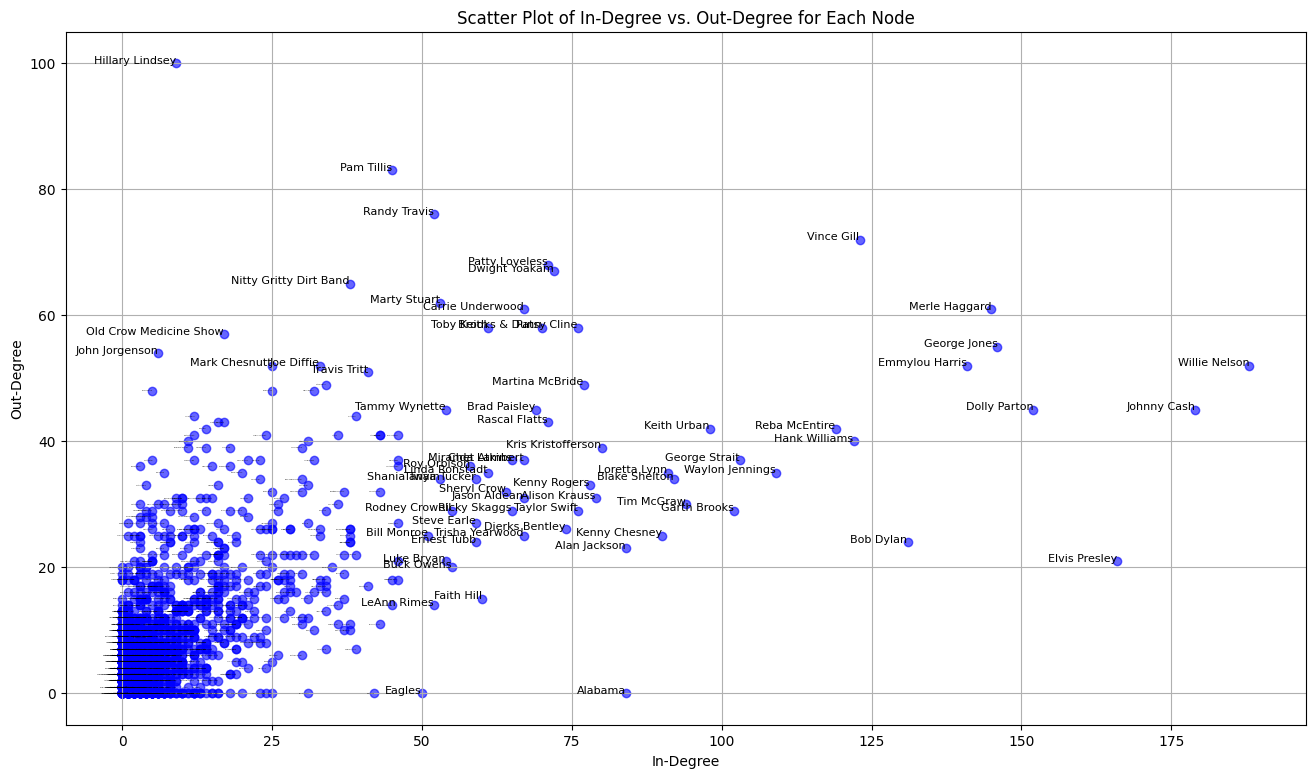

In [26]:
# Get in-degree and out-degree for each node
in_degrees = dict(GD.in_degree())
out_degrees = dict(GD.out_degree())

# Extract lists of nodes, in-degrees, and out-degrees
nodes = list(GD.nodes())
in_deg_values = [in_degrees[node] for node in nodes]
out_deg_values = [out_degrees[node] for node in nodes]

# Create scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(in_deg_values, out_deg_values, color='blue', alpha=0.6)

# Annotate each point with the node name (author's name)
for node in nodes:
    x = in_degrees[node]
    y = out_degrees[node]
    plt.text(x, y, node, fontsize= 8 if x>=50 or y>=50 else 0, ha='right', color='black')

# Label axes and title
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of In-Degree vs. Out-Degree for Each Node')
plt.grid(True)
plt.show()


By backtracking and looking at the URLs created by our regex patterns back in Week 4, we can see that there is an unaccounted challenge regarding the redirecting links based on parenthesees. Bands with generic names, such as the mentioned _Alabama_ (also the name of a state in USA) and _The Eagles_ (a commonly known bird), these redirect links causes the out-going edges to fail and txt files to be empty. 

Since this issue was only caused to a few outliers, we decided not to fix the issue for the time being.

## Exercises Part B: Advanced Tools

### B.1 Analysis of directed graph

In [27]:
len(GD.nodes())

2002

In [28]:
len(GD.edges())

16724

### B.1.1 What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

In [29]:
print("[IN-DEGREE]")
print("  median", median(GD_in_degree_values))
print("  mean", mean(GD_in_degree_values))
print("  mode", mode(GD_in_degree_values))
print("  min", min(GD_in_degree_values))
print("  max", max(GD_in_degree_values))

[IN-DEGREE]
  median 3.0
  mean 8.353646353646354
  mode 1
  min 0
  max 188


In [30]:
print("[OUT-DEGREE]")
print("  median", median(GD_out_degree_values))
print("  mean", mean(GD_out_degree_values))
print("  mode", mode(GD_out_degree_values))
print("  min", min(GD_out_degree_values))
print("  max", max(GD_out_degree_values))

[OUT-DEGREE]
  median 5.0
  mean 8.353646353646354
  mode 0
  min 0
  max 100


In [31]:
in_degreee_exponent = powerlaw.Fit(GD_in_degree_values).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [32]:
print(in_degreee_exponent)

2.6876958408783373


In [33]:
out_degreee_exponent = powerlaw.Fit(GD_out_degree_values).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [34]:
print(out_degreee_exponent)

7.3620675045925275


The in-degree exponent of 2.7 suggests a scale-free structure with hubs in terms of incoming connections, while the high out-degree exponent of 7.4 indicates a much more uniform distribution in outgoing links, implying most nodes have similar, low out-degrees. This asymmetry points to a network where few nodes attract many connections, but those nodes do not reciprocate with similarly high out-degrees.

### B.1.2 Heatmap of in-degree versus out-degree 

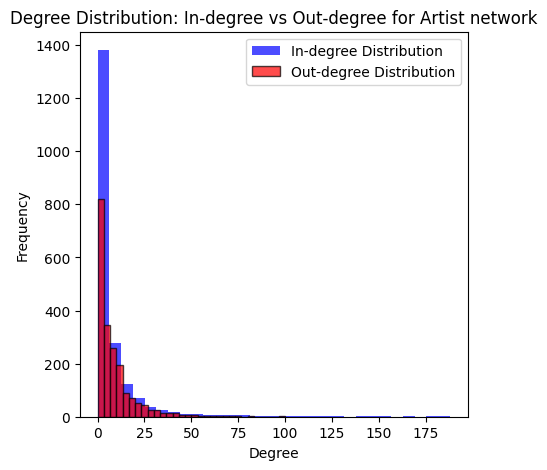

In [35]:
# Set size of figure
plt.figure(figsize=(5, 5))

# Histogram of In-degree Distribution
plt.hist(
    GD_in_degree_values, 
    bins=30, 
    alpha=0.7, 
    label="In-degree Distribution", 
    color="blue"
)

# Histogram of Out-degree Distribution
plt.hist(
    GD_out_degree_values, 
    bins=30, 
    alpha=0.7, 
    label="Out-degree Distribution", 
    color="red",
    edgecolor="black"
)

# Settings of axis/plot
plt.xlabel("Degree")
plt.ylabel("Frequency")
# plt.yscale('log')
plt.legend()
plt.title("Degree Distribution: In-degree vs Out-degree for Artist network")
plt.show()

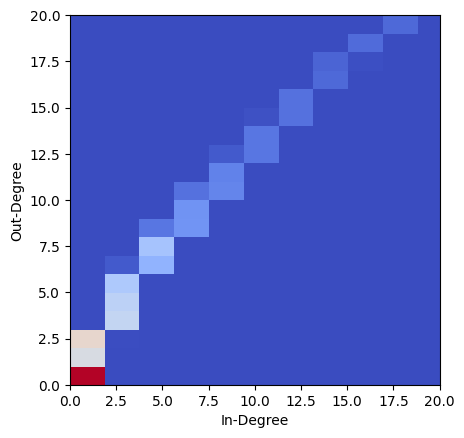

In [36]:
# Generate some test data
x = GD_in_degree_values
y = GD_out_degree_values

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='coolwarm')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.show()

3. The heatmap is effective for getting an insight into a distribution of out-degree to in-degree ratio. Scatter plot points are too crowded, hard to measure by human eye, while heatmap plot groups together similar points and visualizes them using frequency of occurence in each of the groups. Using heatmaps it's easier to notice that the distribution is skewed, mostly singers have bigger out-degree number than in-degree - the line of rectangles isn't strictly diagonal, but a bit shifted towards out-degree.

4. Directed graph has more information than undirected one, so usually there might be more knowledge to infer from this version. Thanks to directivity we can ask questions about the general trends between the nodes in our graph, analyze the flow and popularity of the nodes or identify sinks (nodes that  have only incoming edges) and sources (nodes that have only outcoming edges). In our graph we can use directed graph to analyze direction of the influence among the country music authors, which couldn't be done with undirected graph. For example we can localize people that had a lot of influence for various country music singers despite not being heavy influenced by the other country music authors - those people have big number of in-degree and small number of out-degree, those people tend to be lyrics or song writers that are later performed by many of the singers. Example of the analysis that doesn't require in/out distinction could be general popularity analysis depending on the number of connected edges. While having a direction can tell us about the flow of popularity and thus allow us to more detailed analysis, analysing edges without in/out distinction can also give as general insight about the popularity of certain authors.

Out-degree vs Length of Content:
  Pearson correlation: 0.448 (p-value: 0.000)
  Spearman correlation: 0.656 (p-value: 0.000)

In-degree vs Length of Content:
  Pearson correlation: 0.535 (p-value: 0.000)
  Spearman correlation: 0.535 (p-value: 0.000)



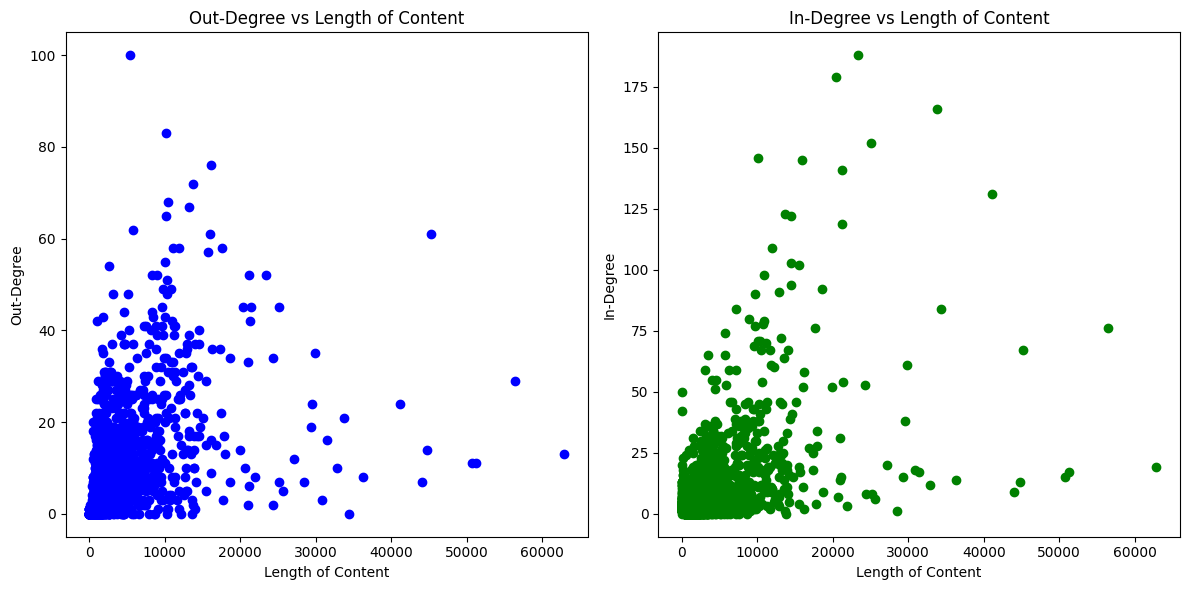

In [37]:

# Get node attributes and calculate degrees
lengths = np.array([GD.nodes[node]['length_of_content'] for node in GD.nodes()])
out_degrees = np.array([GD.out_degree(node) for node in GD.nodes()])
in_degrees = np.array([GD.in_degree(node) for node in GD.nodes()])

# Calculate Pearson and Spearman correlations for out-degree (links from node)
pearson_out, pval_pearson_out = pearsonr(lengths, out_degrees)
spearman_out, pval_spearman_out = spearmanr(lengths, out_degrees)

# Calculate Pearson and Spearman correlations for in-degree (links to node)
pearson_in, pval_pearson_in = pearsonr(lengths, in_degrees)
spearman_in, pval_spearman_in = spearmanr(lengths, in_degrees)

# Print correlation results
print(f"Out-degree vs Length of Content:")
print(f"  Pearson correlation: {pearson_out:.3f} (p-value: {pval_pearson_out:.3f})")
print(f"  Spearman correlation: {spearman_out:.3f} (p-value: {pval_spearman_out:.3f})\n")

print(f"In-degree vs Length of Content:")
print(f"  Pearson correlation: {pearson_in:.3f} (p-value: {pval_pearson_in:.3f})")
print(f"  Spearman correlation: {spearman_in:.3f} (p-value: {pval_spearman_in:.3f})\n")

# Plotting the relationships
plt.figure(figsize=(12, 6))

# Scatter plot for Out-degree vs Length of Content
plt.subplot(1, 2, 1)
plt.scatter(lengths, out_degrees, color='blue')
plt.xlabel("Length of Content")
plt.ylabel("Out-Degree")
plt.title("Out-Degree vs Length of Content")

# Scatter plot for In-degree vs Length of Content
plt.subplot(1, 2, 2)
plt.scatter(lengths, in_degrees, color='green')
plt.xlabel("Length of Content")
plt.ylabel("In-Degree")
plt.title("In-Degree vs Length of Content")

plt.tight_layout()
plt.show()

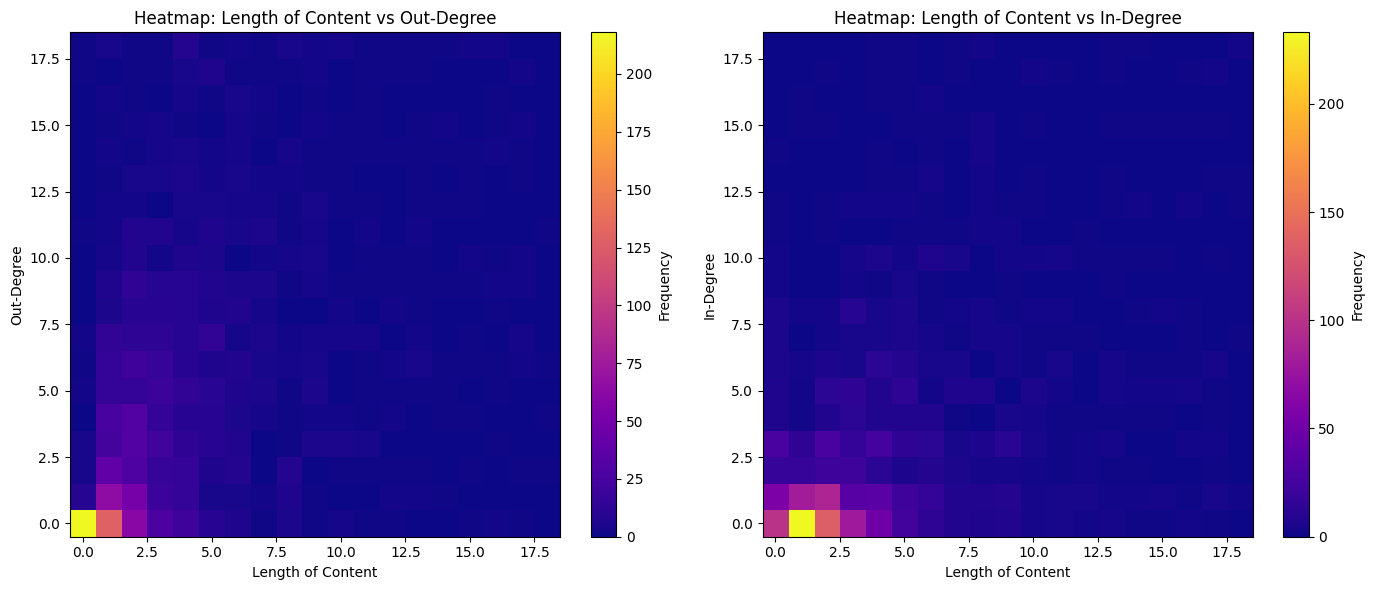

In [38]:

# Define bin edges for length and degree
length_max_limit = 10000
out_degree_limit = 20
in_degree_limit = 30

num_bins = 20
length_bins = np.linspace(lengths.min(), length_max_limit, num_bins)
out_degree_bins = np.linspace(out_degrees.min(),out_degree_limit, num_bins)
in_degree_bins = np.linspace(in_degrees.min(), in_degree_limit, num_bins)

# Create 2D histograms for heatmaps
out_degree_heatmap, _, _ = np.histogram2d(lengths, out_degrees, bins=[length_bins, out_degree_bins])
in_degree_heatmap, _, _ = np.histogram2d(lengths, in_degrees, bins=[length_bins, in_degree_bins])

# Plot the heatmaps
plt.figure(figsize=(14, 6))

# Heatmap for Length of Content vs Out-Degree
plt.subplot(1, 2, 1)
plt.imshow(out_degree_heatmap.T, origin='lower', aspect='auto', cmap='plasma')
plt.colorbar(label="Frequency")
plt.xlabel("Length of Content")
plt.ylabel("Out-Degree")
plt.title("Heatmap: Length of Content vs Out-Degree")

# Heatmap for Length of Content vs In-Degree
plt.subplot(1, 2, 2)
plt.imshow(in_degree_heatmap.T, origin='lower', aspect='auto', cmap='plasma')
plt.colorbar(label="Frequency")
plt.xlabel("Length of Content")
plt.ylabel("In-Degree")
plt.title("Heatmap: Length of Content vs In-Degree")

plt.tight_layout()
plt.show()

The relationship between out/in-degree and length of content is weak (pearson coefficients: 0.448 and 0.535). Visualizing metrics doesn't support that more length of content results in higher in-degree or out-degree either. However, the correlation between in-degree and length of content is a bit higher than for out-degree which might be caused by the lyrics authors that might have more hyperlinks connected to them.

### Exercise 4
1.Find the 5 most central characters according to degree centrality.

In [39]:
degree_centrality = nx.degree_centrality(GD)
top_5_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
print("Top 5 by degree centrality:", top_5_degree)


Top 5 by degree centrality: ['Willie Nelson', 'Johnny Cash', 'Merle Haggard', 'George Jones', 'Dolly Parton']


2.Find the 5 most central characters according to betweenness centrality.

In [40]:
betweenness_centrality = nx.betweenness_centrality(GD)
top_5_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
print("Top 5 by betweenness centrality:", top_5_betweenness)

Top 5 by betweenness centrality: ['Merle Haggard', 'Vince Gill', 'Willie Nelson', 'Johnny Cash', 'Toby Keith']


In [41]:
# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")
# load graph object from file
G = nx.read_gexf(file_path)

# We remove orphan nodes so our visualization isnt distorted by nodes that aren't connected to the other ones
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

# Create ForceAtlas2 configuration
fa2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=4.0,

    # Performance
    jitterTolerance=8.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=0.1,

    # Log
    verbose=True
    )

# Running the algorithm to get node positions
positions = fa2.forceatlas2_networkx_layout(GD, pos=None, iterations=20)

100%|██████████| 20/20 [00:00<00:00, 22.63it/s]

BarnesHut Approximation  took  0.07  seconds
Repulsion forces  took  0.78  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


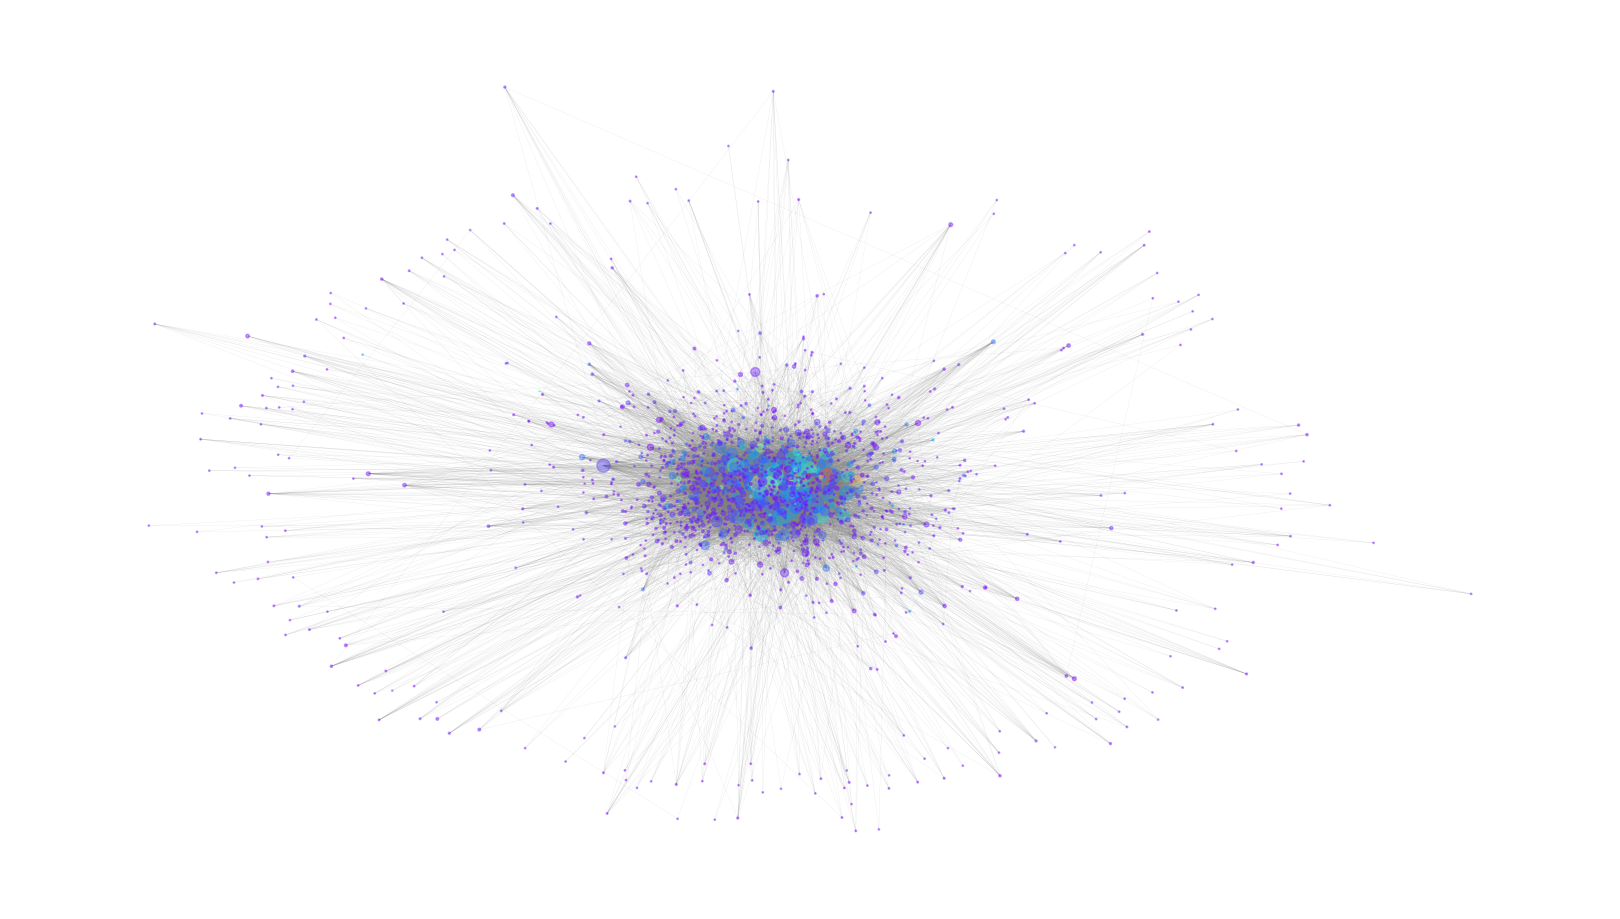

In [42]:
betweenness_centrality = nx.betweenness_centrality(G)
# Extract the 'length_of_content' attribute values
lengths = nx.get_node_attributes(G, 'length_of_content').values()

# Normalize these values to range [0, 1] for colormap application
norm = mcolors.Normalize(vmin=min(lengths), vmax=max(lengths))

# Choose a colormap; e.g., 'rainbow'
cmap_ = cm.rainbow

# Map each node's 'length_of_content' to a color
node_colors = [cmap_(norm(length)) for length in lengths]

# Set node sizes based on node degrees (scaled for visibility)
node_sizes = [(node_val * 5000 + 1) for node_val in betweenness_centrality.values()]


plt.figure(figsize=(16, 9))

nx.draw(
    G,
    pos=positions,
    cmap=cmap_, 
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.4,
    width=0.1,
    edge_color="grey",
    with_labels=False
)

plt.axis('off')

plt.show()

In [43]:
# load graph object from file and make it directional graph
file_path_dir = os.path.join(folder_path, "country_musicians_directed.gexf")
GD = nx.read_gexf(file_path_dir)

# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")
# load graph object from file
G = nx.read_gexf(file_path)

3.Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).

In [44]:
eigenvector_centrality = nx.eigenvector_centrality(G)
top_5_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
print("Top 5 by eigenvector centrality:", top_5_eigenvector)


Top 5 by eigenvector centrality: ['Willie Nelson', 'George Jones', 'Merle Haggard', 'Johnny Cash', 'Vince Gill']


4.Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?

Betweeness centrality and degree centrality are correlated. It's an expected outcome because highly connected nodes are usually also bridges for other nodes (one popular artist becomes an inspiration for other artists). Similarly, also eigenvector centrality and degree centrality are correlated.

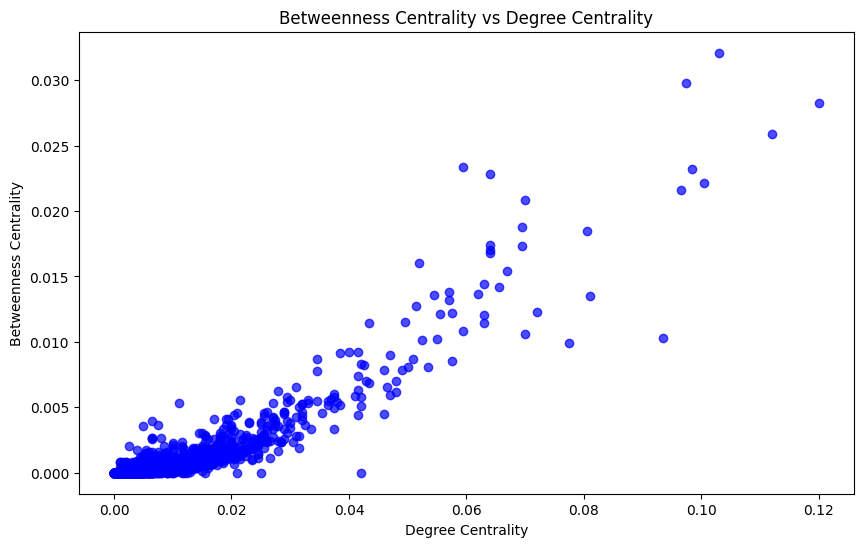

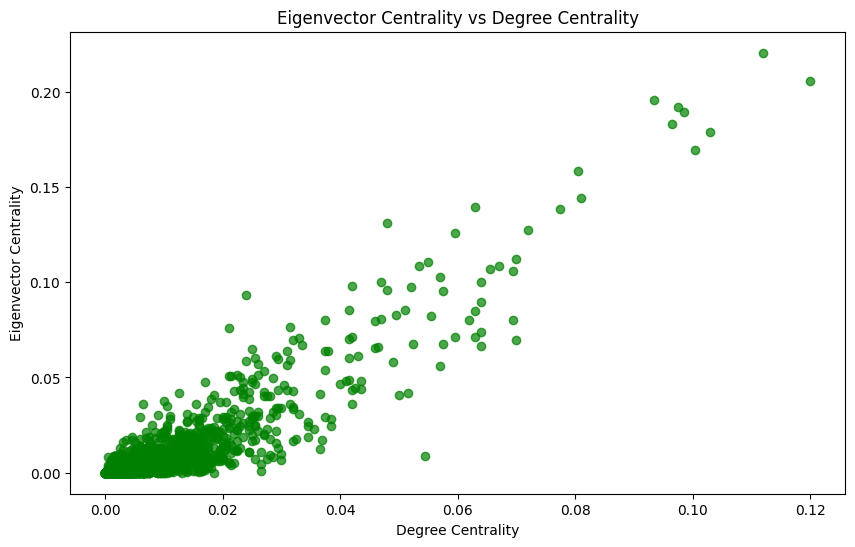

In [45]:
degree_centrality = nx.degree_centrality(GD)
betweenness_centrality = nx.betweenness_centrality(GD)
eigenvector_centrality = nx.eigenvector_centrality(GD)

degree_values = list(degree_centrality.values())
betweenness_values = list(betweenness_centrality.values())
eigenvector_values = list(eigenvector_centrality.values())

# Plot betweenness centrality vs. degree centrality
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, betweenness_values, alpha=0.7, color='blue')
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality vs Degree Centrality")
plt.show()

# Plot eigenvector centrality vs. degree centrality
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, eigenvector_values, alpha=0.7, color='green')
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Eigenvector Centrality vs Degree Centrality")
plt.show()

5.Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.

In [49]:
nx.degree_assortativity_coefficient(G)


-0.01843807920334239

Because of the result is close to 0, there’s no assortative mixing by degree, which mean that connections between nodes are not influenced by node degree.

6.Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?

In [ ]:
assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'length_of_content')
print("Assortativity Coefficient based on length_of_content:", assortativity_coefficient)

Assortativity Coefficient based on length_of_content: -0.0015573285018068979


In case of attribute assortativity coefficient with respect to the length_of_content no particular relation has been found (coefficient close to 0).

7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>    * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.


In [66]:
#len(G.edges) #14217
# 2002 len(G.nodes)
randomG = nx.barabasi_albert_graph(2002,7)
avg_shortest_path_length_randomG = nx.average_shortest_path_length(randomG)
avg_shortest_path_length_randomG

2.9150324937431384

In [77]:
if nx.is_connected(G):
    avg_shortest_path_length_G = nx.average_shortest_path_length(G)
    print("Average shortest path length of G:", avg_shortest_path_length_G)
else:
    print("The graph G is not connected, so average shortest path length is undefined.")
    avg_shortest_path_length_G = None


The graph G is not connected, so average shortest path length is undefined.


## Part C

Exercise 5: Visualizing the Network Backbone

1.Extract the network backbone for both Weighted Network 1 and 2. You can implement it yourself based on the scientific paper or find an implentation on GitHub (there are several ones to choose from ... I like this implementation, which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of α to get an aestetically pleasing visualization (but don't make the resulting network too sparse).

2.Plot the resulting two networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.

3.Comment on your results

- Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the two networks. Describe your findings in your own words.
- Weighted network 1 and 2 are very different. We have removed edges with low/high edge betweenness centrality respectively. What has that done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structure.
